📊 Sales Summary by Product:
      product  total_quantity   revenue
0  Headphones              18   36000.0
1      Laptop               8  560000.0
2      Mobile              16  240000.0
3      Tablet               6  120000.0


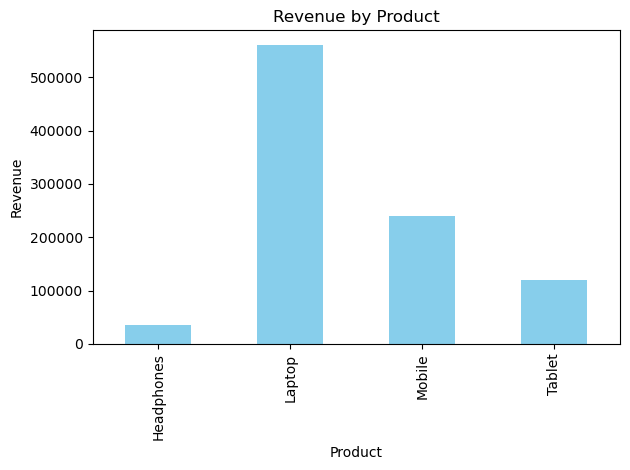

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Step 3: Insert sample data (skip if already inserted)
sample_data = [
    ('Laptop', 5, 70000),
    ('Mobile', 10, 15000),
    ('Tablet', 4, 20000),
    ('Headphones', 8, 2000),
    ('Mobile', 6, 15000),
    ('Laptop', 3, 70000),
    ('Tablet', 2, 20000),
    ('Headphones', 10, 2000)
]

# Optional: Clear old data for testing
cursor.execute("DELETE FROM sales")
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# Step 4: Run SQL query to get summary
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM 
    sales
GROUP BY 
    product
"""

df = pd.read_sql_query(query, conn)

# Step 5: Print result
print("📊 Sales Summary by Product:")
print(df)

# Step 6: Plot revenue bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Close DB connection
conn.close()
